In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here 
y_train, X_train, ids = load_csv_data(DATA_TRAIN_PATH)

In [6]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, X_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [3]:
from implementations import read_header
features = read_header(DATA_TRAIN_PATH)

In [7]:
from implementations import preprocess
tX_train, ty_train, tX_test, ty_test, cont_features = preprocess(X_train, y_train, X_test, encodable_threshold=0.5, imputable_threshold=0.5)

In [10]:
tX_train.shape

(250000, 31)

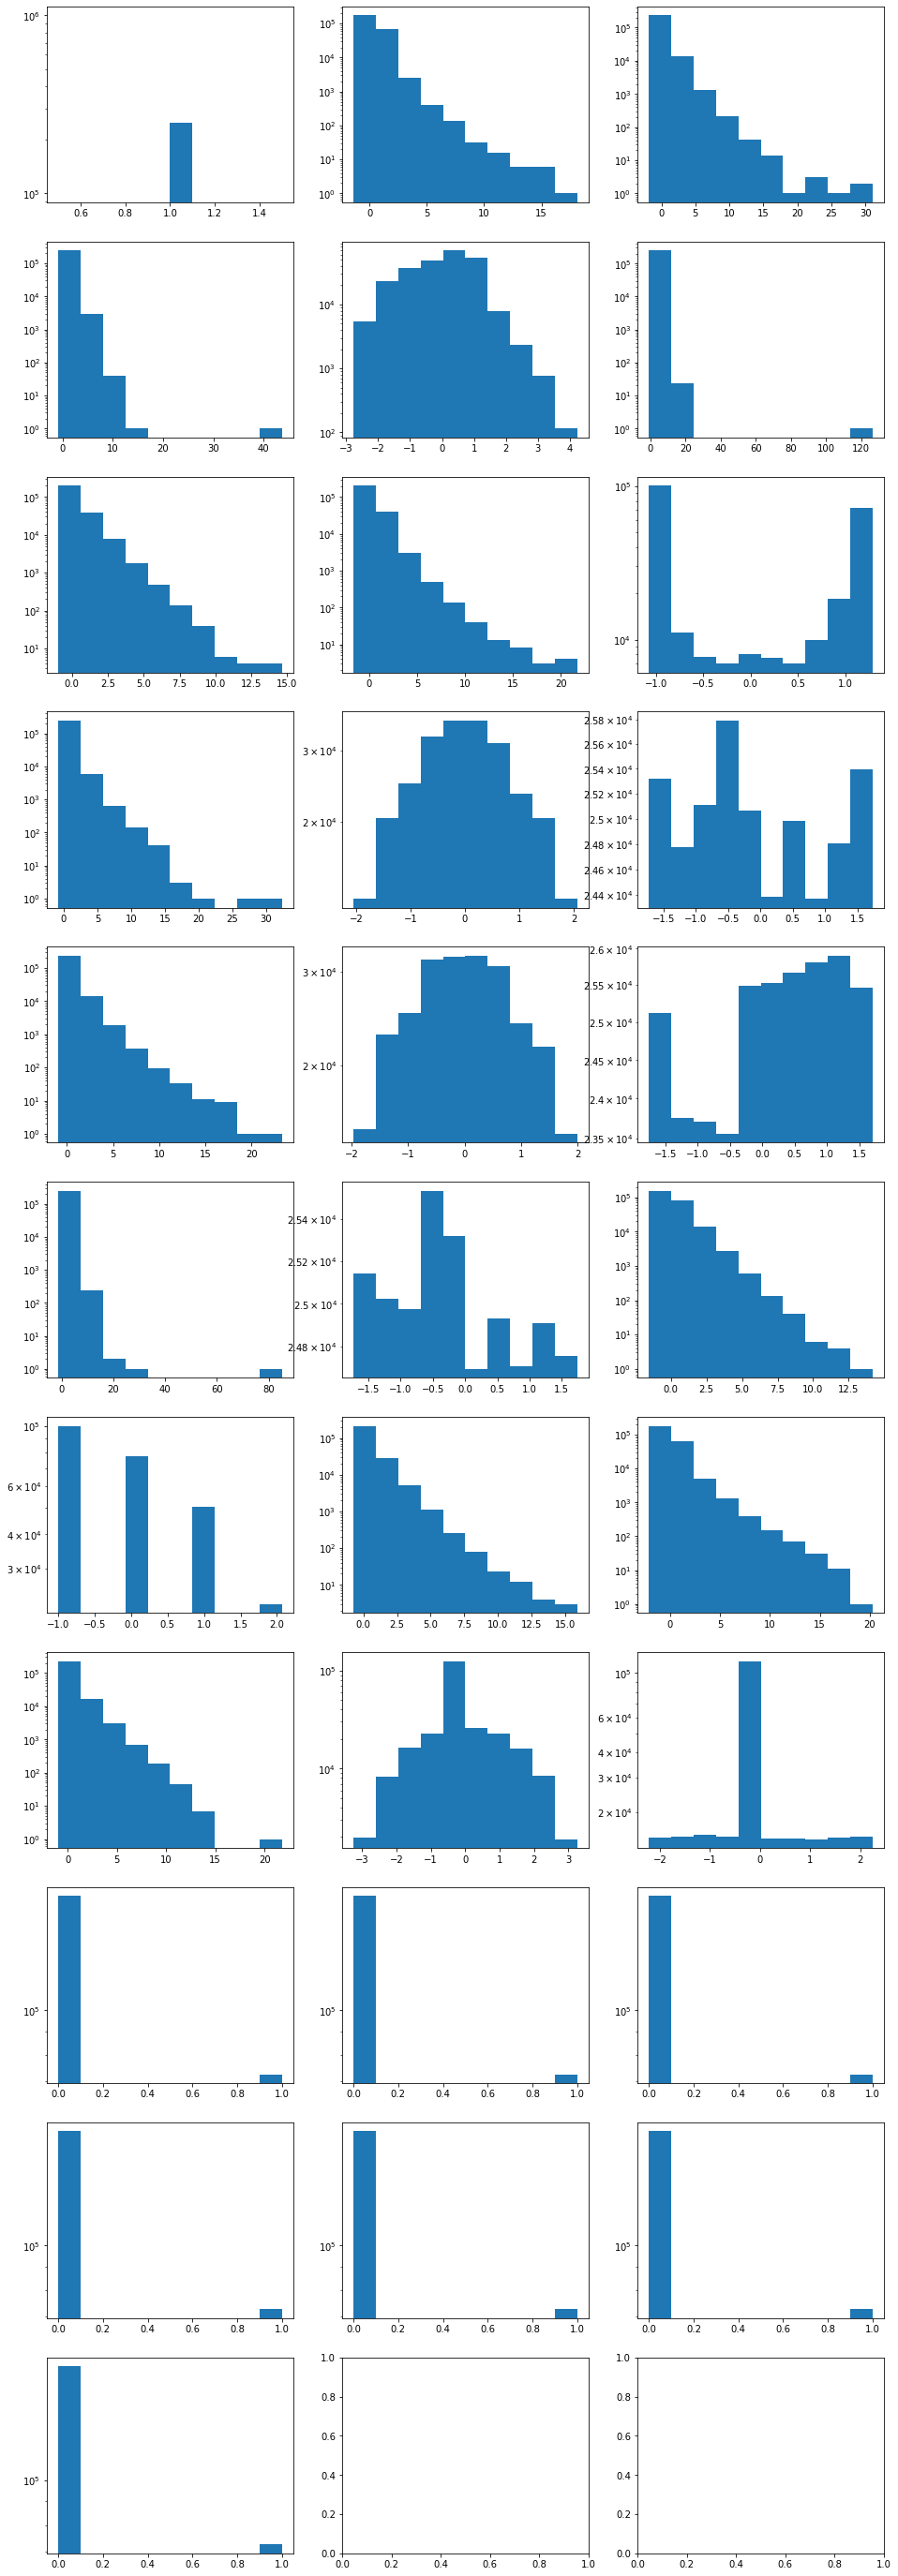

In [12]:
fig, axs = plt.subplots(11, 3, figsize=(16, 50))

for i in range(tX_train.shape[1]):
    ax = axs[i//3, i%3]
    ax.hist(tX_train[:, i])
    ax.set_yscale('log')
    # ax.set_title(features[i])

plt.show()

In [4]:
positive_cols = [1, 2, 3, 8, 9, 10, 13, 16, 19, 21, 29]

In [5]:
np.log(X_train[positive_cols])

/var/folders/rs/c9bqjyq95q59ngc5v1t0gz_00000gn/T/ipykernel_8169/1695630036.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(X_train[positive_cols])
/var/folders/rs/c9bqjyq95q59ngc5v1t0gz_00000gn/T/ipykernel_8169/1695630036.py:1: RuntimeWarning: invalid value encountered in log
  np.log(X_train[positive_cols])


array([[ 5.08101298,  4.23073852,  4.63700794,  3.87423806,         nan,
                nan,         nan,  1.24501877,  0.73140589,  4.82956895,
        -0.12897038,  0.34642257,         nan,  3.7380029 ,  0.71245949,
                nan,  3.60869924, -0.69114918, -2.27302629,  3.80006298,
                nan,  5.10319017,  0.        ,  3.83354241, -0.32158362,
         0.14669438,         nan,         nan,         nan,  3.83354241],
       [        nan,  5.0886575 ,  4.83590882,  3.5733283 ,         nan,
                nan,         nan,  1.14676733,  2.23387789,  5.2873272 ,
         1.32866525,  0.34642257,         nan,  3.47053686,         nan,
                nan,  4.79916501,         nan,  0.05069311,  3.9942111 ,
                nan,  5.56227267,  0.        ,  3.78987797,  0.71930214,
                nan,         nan,         nan,         nan,  3.78987797],
       [ 4.96915336,  4.3995841 ,  4.3937452 , -0.88188931,         nan,
                nan,         nan,  1.19694819, -0

In [ ]:
fig, axs = plt.subplots(10, 3, figsize=(16, 50))

for i in range(X_train.shape[1]):
    ax = axs[i//3, i%3]
    ax.hist(X_train[:, i])
    ax.set_yscale('log')
    ax.set_title(features[i])

plt.show()

In [ ]:
derived_cols = list(range(13))
raw_cols = list(range(13, 30))

In [ ]:
import seaborn as sns
import pandas as pd
int_cols = [0, 1, 2, 5, 7, 9, 10, 11]
sns.pairplot(pd.DataFrame(np.hstack([X_train[:, int_cols], y_train.reshape((-1, 1))]), columns=list(np.array(features).take(int_cols))+['Label']), hue='Label')

In [ ]:
fig, axs = plt.subplots(17, 2, figsize=(16, 50))

for i in range(tX_train.shape[1]):
    ax = axs[i//2, i%2]
    ax.hist(tX_train[:, i])
    ax.set_yscale('log')
    # ax.set_title(features[i])

plt.show()

In [ ]:
skewed_cols = [1,2,3,6,7,9,12,17,19,20,21]
binned_cols = []
for c in skewed_cols:
    bins = np.linspace(np.min(tX_train[:, c]), np.max(tX_train[:, c]), 10)
    digitized_col = np.digitize(tX_train[:, c], bins)
    binned_cols.append(digitized_col.reshape((-1, 1)))

In [ ]:
binned_X = np.hstack(binned_cols)
tX_train = np.hstack([tX_train, binned_X])

In [ ]:
corrs = []
for i in range(X_train.shape[1]):
    corrs.append(np.corrcoef(X_train[:, i].reshape((-1, 1)), y_train.reshape((-1, 1)))[0, 1])